In [1]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("emails.txt")
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
data.shape

(5728, 2)

In [6]:
data.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [7]:
data['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

## Cleaning the text data

In [8]:
import nltk
import string
import re
stopwords = nltk.corpus.stopwords.words("english")

In [12]:
from nltk.tokenize import word_tokenize

In [27]:
ss = nltk.SnowballStemmer(language = 'english')

In [30]:
def clean_txt_new(sent):
    #Stripping white spaces before and after the text
    sent = sent.strip()
    # Removing Subject from the starting of each text
    sent = sent.lstrip('Subject')
    #Replacing multiple spaces with a single space
    result = re.sub("\s+", " ", sent)
    #Replacing Non-Alpha-numeric and non space charachters with nothing
    result1 = re.sub("[^\w\s]","",result)
    #Normalize case and remove shorter tokens
    tokens = word_tokenize(result1.lower())
    stem_tokens = [ss.stem(word) for word in tokens if word not in stopwords and len(word) > 2] 
    #Join all to form a single string which will be returned from the UDF       
    res = " ".join(stem_tokens)
    return res

In [31]:
data['text_cleaned'] = data['text'].apply(lambda x: clean_txt_new(x))
data.head()

,text,spam,text_cleaned,body_len,punct%,text1
0,Subject: naturally irresistible your corporate...,1,natur irresist corpor ident realli hard recoll...,1143,11.9,naturally irresistible your corporate identity...
1,Subject: the stock trading gunslinger fanny i...,1,stock trade gunsling fanni merril muzo colza a...,506,0.2,he stock trading gunslinger fanny is merrill ...
2,Subject: unbelievable new homes made easy im ...,1,unbeliev new home made easi want show homeown ...,353,2.3,nbelievable new homes made easy im wanting to...
3,Subject: 4 color printing special request add...,1,color print special request addit inform click...,396,6.3,4 color printing special request additional i...
4,"Subject: do not have money , get software cds ...",1,money get softwar cds softwar compat great gro...,181,7.2,"do not have money , get software cds from here..."


In [32]:
data.tail()

,text,spam,text_cleaned,body_len,punct%,text1
5723,Subject: re : research and development charges...,0,research develop charg gpg forward shirley cre...,867,13.0,search and development charges to gpg here it...
5724,"Subject: re : receipts from visit jim , than...",0,receipt visit jim thank invit visit lsu shirle...,890,8.0,"ipts from visit jim , thanks again for the i..."
5725,Subject: re : enron case study update wow ! a...,0,enron case studi updat wow day super thank muc...,1541,11.5,nron case study update wow ! all on the same ...
5726,"Subject: re : interest david , please , call...",0,interest david pleas call shirley crenshaw ass...,749,15.1,"interest david , please , call shirley crens..."
5727,Subject: news : aurora 5 . 2 update aurora ve...,0,news aurora updat aurora version fastest model...,1840,4.8,news : aurora 5 . 2 update aurora version 5 ....


In [35]:
data['text1'] = data['text'].apply(lambda x: x.lstrip('Subject: re :'))
data.head()

,text,spam,text_cleaned,body_len,punct%,text1
0,Subject: naturally irresistible your corporate...,1,natur irresist corpor ident realli hard recoll...,1143,11.9,naturally irresistible your corporate identity...
1,Subject: the stock trading gunslinger fanny i...,1,stock trade gunsling fanni merril muzo colza a...,506,0.2,he stock trading gunslinger fanny is merrill ...
2,Subject: unbelievable new homes made easy im ...,1,unbeliev new home made easi want show homeown ...,353,2.3,nbelievable new homes made easy im wanting to...
3,Subject: 4 color printing special request add...,1,color print special request addit inform click...,396,6.3,4 color printing special request additional i...
4,"Subject: do not have money , get software cds ...",1,money get softwar cds softwar compat great gro...,181,7.2,"do not have money , get software cds from here..."


In [33]:
# User defined function to get percentages of punctuations used
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

In [46]:
# Creating additional features
data['body_len'] = data['text1'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['text1'].apply(lambda x: count_punct(x))
data.head()

,text,spam,text_cleaned,body_len,punct%,text1
0,Subject: naturally irresistible your corporate...,1,natur irresist corpor ident realli hard recoll...,1135,11.9,naturally irresistible your corporate identity...
1,Subject: the stock trading gunslinger fanny i...,1,stock trade gunsling fanni merril muzo colza a...,497,0.0,he stock trading gunslinger fanny is merrill ...
2,Subject: unbelievable new homes made easy im ...,1,unbeliev new home made easi want show homeown ...,344,2.0,nbelievable new homes made easy im wanting to...
3,Subject: 4 color printing special request add...,1,color print special request addit inform click...,388,6.2,4 color printing special request additional i...
4,"Subject: do not have money , get software cds ...",1,money get softwar cds softwar compat great gro...,173,6.9,"do not have money , get software cds from here..."


In [36]:
x = data['text_cleaned'].values
y = data['spam'].values

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 3500)
x_tfidf_train = tfidf.fit_transform(x_train)
x_tfidf_test = tfidf.transform(x_test)

In [39]:
x_tfidf_train_df = pd.DataFrame(x_tfidf_train.toarray())
x_tfidf_test_df = pd.DataFrame(x_tfidf_test.toarray())

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc
def model_training(x_train,y_train,x_test, y_test,model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test,y_pred)
    cm = confusion_matrix(y_test,y_pred)
    return(acc,f1,cm)

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
a, f, cm = model_training(x_tfidf_train_df, y_train, x_tfidf_test_df, y_test, rfc)
print(round(a*100,2))
print(round(f*100,2))
print(cm)

C:\Users\S.Joshi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


96.42
92.01
[[869  16]
 [ 25 236]]


In [58]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
a, f, cm = model_training(x_tfidf_train_df, y_train, x_tfidf_test_df, y_test, mnb)
print(round(a*100,2))
print(round(f*100,2))
print(cm)

97.82
95.09
[[879   6]
 [ 19 242]]


In [73]:
df = pd.DataFrame([["Grab the offer this diwali!! Flat 50% sale on all men's accessories and footwear.Hurry!! Offer valid till 20th November"],['Hello Yash!! Offer offer offer!! just for you grab it'],['Hi! Please call when free']], columns = ['Text'])
df

,Text
0,Grab the offer this diwali!! Flat 50% sale on ...
1,Hello Yash!! Offer offer offer!! just for you ...
2,Hi! Please call when free


In [74]:
# Creating a user defined function to perform all the above text cleaning in single fucntion
def clean_text_nostem(text):
    # Stripping white spaces before and after the text
    text = text.strip(" ")
    # Replacing - with space
    text = re.sub('-'," ", text)
    # Replacing multiple spaces with a single space
    text = re.sub("\s+"," ", text)
    # Replacing punctuations
    text = "".join([char for char in text if char not in string.punctuation])
    # Creating tokens
    tokens = re.split('\W+', text)
    # removing stopwords and stemming - snowball stemming
    text_final = [word for word in tokens if word not in stopwords and len(word)>2]
    # creating a list of tokens
    text_final = " ".join(text_final)
    return text_final

In [75]:
df['clean_text'] = df['Text'].apply(lambda x: clean_text_nostem(x.lower()))
inp = tfidf.transform(df['clean_text'])
inp_df = pd.DataFrame(inp.toarray())
inp_df

,0,1,2,3,4,5,6,7,8,9,...,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
a = mnb.predict(inp_df)
a

array([1, 1, 0], dtype=int64)

In [85]:
c = 0
for i in a:
    if i == 1:
        print(df['Text'][c])
        print("It is a Spam Message")
    else:
        print("Not a Spam Message")
    c+=1

Grab the offer this diwali!! Flat 50% sale on all men's accessories and footwear.Hurry!! Offer valid till 20th November
It is a Spam Message
Hello Yash!! Offer offer offer!! just for you grab it
It is a Spam Message
Not a Spam Message


In [67]:
probs=mnb.predict_proba(x_tfidf_test_df)
probs
# 1st column shows probability for class 0 and 2nd column shows probability for class 1

array([[9.77962242e-01, 2.20377583e-02],
       [9.93129375e-01, 6.87062512e-03],
       [6.95771552e-04, 9.99304228e-01],
       ...,
       [9.06512749e-01, 9.34872511e-02],
       [9.67061614e-01, 3.29383860e-02],
       [9.39435293e-02, 9.06056471e-01]])

In [69]:
from sklearn import metrics
# Keep probabilities of the positive class only
prob_positive=probs[:,1] # taking probabilities of class 1 only
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive) # actual value of y and probability of class 1
# 3 values are returned in tuple of list format, false positive rate,true positive rate and threshold value
# auc-Area Under the curve
roc_auc=metrics.auc(fpr,tpr)
# area under the curve is computed
print("Area under the curve:",roc_auc)
# this auc can be considered as the score of the model and not accuracy as it gives score for one threshold value only

Area under the curve: 0.9982076758231054


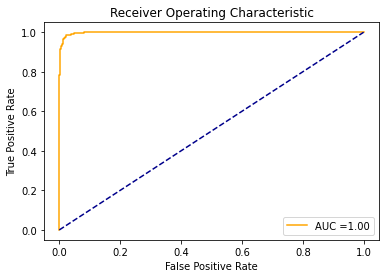

In [71]:
# Plotting ROC Curve
# The area under the curve is the area between the ROC line(orange line) and the axis(blue line)
#  The bigger the area covered, the better the ML models are at distinguishing the classes
%matplotlib inline
import matplotlib.pyplot as plt
plt.title("Receiver Operating Characteristic")
plt.plot(fpr,tpr,'orange',label='AUC =%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [79]:
new_pred = (prob_positive>0.993).astype("int")
new_pred

array([0, 0, 1, ..., 0, 0, 0])

In [80]:
cm = confusion_matrix(y_test,new_pred)
cm

array([[885,   0],
       [177,  84]], dtype=int64)